In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rcParams
%matplotlib inline
mpl.rcParams['font.family'] = "Arial"

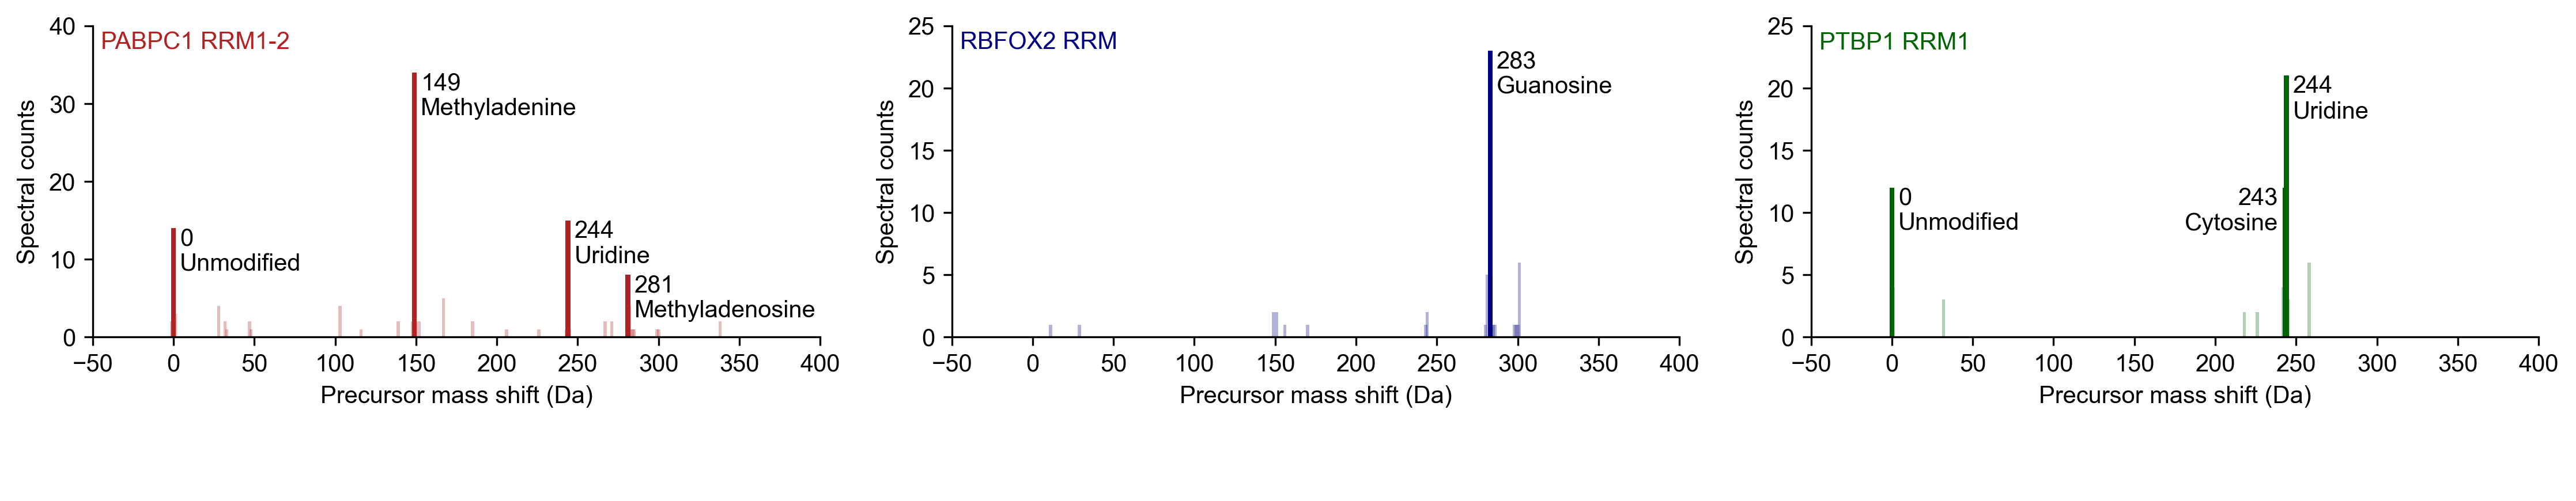

In [15]:
mod12,mod34,mod56=[],[],[]
for j in ['mRBS_1','mRBS_2','TRBS_1','TRBS_2']:
    m1=pd.read_csv('Open_psm_'+j+'.tsv',sep='\t')
    m12=m1.loc[m1['Gene']=='PABPC1'].loc[m1['Protein End']<=175].loc[m1['Protein Start']>=11]
    m34=m1.loc[m1['Gene']=='RBFOX2'].loc[m1['Protein End']<=187].loc[m1['Protein Start']>=111]
    m56=m1.loc[m1['Gene']=='PTBP1'].loc[m1['Protein End']<=143].loc[m1['Protein Start']>=59]
    mod12+=[round(i) for i in list(m12['Delta Mass'])]
    mod34+=[round(i) for i in list(m34['Delta Mass'])]
    mod56+=[round(i) for i in list(m56['Delta Mass'])]

fig,ax=plt.subplots(1,3,figsize=(15,3))
for i in np.arange(-50,401,1):
    ax[0].bar(i,mod12.count(i),color='firebrick',width=2,alpha=0.3)
    ax[1].bar(i,mod34.count(i),color='navy',width=2,alpha=0.3)
    ax[2].bar(i,mod56.count(i),color='darkgreen',width=2,alpha=0.3)
for n,i in enumerate([0,149,244,281]):
    ax[0].bar(i,mod12.count(i),color='firebrick',width=3)
    ax[0].text(i+4,mod12.count(i),str(i)+'\n'+['Unmodified','Methyladenine','Uridine','Methyladenosine'][n],va='top',ha='left')
ax[1].bar(283,mod34.count(283),color='navy',width=3)
ax[1].text(283+4,mod34.count(283),str(283)+'\nGuanosine',va='top',ha='left')
for n,i in enumerate([0,244]):
    ax[2].bar(i,mod56.count(i),color='darkgreen',width=3)
    ax[2].text(i+4,mod56.count(i),str(i)+'\n'+['Unmodified','Uridine'][n],va='top',ha='left')
ax[2].bar(243,mod56.count(243),color='darkgreen',width=3)
ax[2].text(243-4,mod56.count(243),str(243)+'\nCytosine',va='top',ha='right')
for i in range(3):
    ax[i].set_xlim(-50,400)
    ax[i].set_ylim(0,[40,25,25][i])
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["top"].set_visible(False)
    ax[i].text(-45,[40,25,25][i]*0.98,['PABPC1 RRM1-2','RBFOX2 RRM','PTBP1 RRM1'][i],color=['firebrick','navy','darkgreen'][i],va='top',ha='left')
    ax[i].set_ylabel('Spectral counts')
    ax[i].set_xlabel('Precursor mass shift (Da)\n\n\n')
fig.tight_layout()
fig.savefig('meA_G_C_RRM.pdf')

In [26]:
##PABPC1 RRM1-2
for j in ['mRBS_1']:
    m0=pd.read_csv('Open_psm_'+j+'.tsv',sep='\t')
    m0=m0.loc[m0['Gene']=='PABPC1'].loc[m0['Protein Start']<=175].loc[m0['Protein End']>=11]
    m0['Mod']=[round(i) for i in list(m0['Delta Mass'])]
    m1=m0.loc[m0['Mod']==149]
    m2=m0.loc[m0['Mod']==281]
for j in ['mRBS_2','TRBS_1','TRBS_2']:
    m0=pd.read_csv('Open_psm_'+j+'.tsv',sep='\t')
    m0=m0.loc[m0['Gene']=='PABPC1'].loc[m0['Protein Start']<=175].loc[m0['Protein End']>=11]
    m0['Mod']=[round(i) for i in list(m0['Delta Mass'])]
    m1=pd.concat([m1,m0.loc[m0['Mod']==149]])
    m2=pd.concat([m2,m0.loc[m0['Mod']==281]])
for x in [m1,m2]:
    print(list(set([i for i in list(x['MSFragger Localization']) if sum(1 for c in i if c.islower())==1])))

['GYGFVhFETQEAAER']
['GYGFVhFETQEAAER']


In [27]:
##RBFOX2 RRM
for j in ['mRBS_1']:
    m0=pd.read_csv('Open_psm_'+j+'.tsv',sep='\t')
    m0=m0.loc[m0['Gene']=='RBFOX2'].loc[m0['Protein Start']<=187].loc[m0['Protein End']>=111]
    m0['Mod']=[round(i) for i in list(m0['Delta Mass'])]
    m1=m0.loc[m0['Mod']==283]
for j in ['mRBS_2','TRBS_1','TRBS_2']:
    m0=pd.read_csv('Open_psm_'+j+'.tsv',sep='\t')
    m0=m0.loc[m0['Gene']=='RBFOX2'].loc[m0['Protein Start']<=187].loc[m0['Protein End']>=111]
    m0['Mod']=[round(i) for i in list(m0['Delta Mass'])]
    m1=pd.concat([m1,m0.loc[m0['Mod']==283]])
print(list(set([i for i in list(m1['MSFragger Localization']) if sum(1 for c in i if c.islower())==1])))

['GFGFvTFENSADADR', 'GFGfVTFENSADADR']


In [16]:
##PTBP1 RRM1
for j in ['mRBS_1']:
    m0=pd.read_csv('Open_psm_'+j+'.tsv',sep='\t')
    m0=m0.loc[m0['Gene']=='PTBP1'].loc[m0['Protein Start']<=143].loc[m0['Protein End']>=59]
    m0['Mod']=[round(i) for i in list(m0['Delta Mass'])]
    m1=m0.loc[m0['Mod']==243]
for j in ['mRBS_2','TRBS_1','TRBS_2']:
    m0=pd.read_csv('Open_psm_'+j+'.tsv',sep='\t')
    m0=m0.loc[m0['Gene']=='PTBP1'].loc[m0['Protein Start']<=143].loc[m0['Protein End']>=59]
    m0['Mod']=[round(i) for i in list(m0['Delta Mass'])]
    m1=pd.concat([m1,m0.loc[m0['Mod']==243]])
print(list(set([i for i in list(m1['MSFragger Localization']) if sum(1 for c in i if c.islower())==1])))

['GQPIYIQFSNhKELK']


In [18]:
go=pd.read_csv('uniprot-compressed_true_download_true_fields_accession_2Cid_2Cgo_2Cg-2022.11.11-04.12.32.63.tsv',sep='\t')
go.set_index('Entry',inplace=True)
go.fillna('',inplace=True)
go['RBP']=[int('GO:0003723' in i) for i in list(go['Gene Ontology IDs'])]
go=go.loc[go['RBP']==1]
for x in [[112,244],[226],[266],[149,281],[283],[243]]:
    prot,rbs=[],[]
    for y in x:
        for j in ['mRBS_1','mRBS_2','TRBS_1','TRBS_2']:
            m1=pd.read_csv('Open_psm_'+j+'.tsv',sep='\t')
            m1['Mod']=round(m1['Delta Mass'])
            m1['PP']=m1['Protein ID']+'.'+m1['Peptide']
            md1=m1.loc[m1['Mod']==y]
            rbs+=list(md1['PP'])
            prot+=list(md1['Protein ID'])
    rbs=list(set(rbs))
    prot=list(set(prot))
    print(x)
    print('#Prot: '+str(len(prot)))
    print('#RBS: '+str(len(rbs)))
    print(round(sum([int(z.split('.')[0] in go.index) for z in rbs])/len(rbs)*100,1))
    print(' ')
                

[112, 244]
#Prot: 421
#RBS: 1869
97.6
 
[226]
#Prot: 141
#RBS: 411
97.8
 
[266]
#Prot: 40
#RBS: 89
100.0
 
[149, 281]
#Prot: 62
#RBS: 120
98.3
 
[283]
#Prot: 55
#RBS: 112
99.1
 
[243]
#Prot: 210
#RBS: 614
99.0
 
